# Activity recognition with healthy older people using a battery less wearable sensor Data Set (d1p01M)

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Importing datasets

In [2]:
data = pd.read_csv("d1p01M.csv")
data.head()

,Time in seconds starting from 0 rounded to the closest 0.025s,Acceleration reading in G for frontal axis,Acceleration reading in G for vertical axis,Acceleration reading in G for lateral axis,Id of antenna reading sensor,Received signal strength indicator (RSSI),Phase,Frequency,Label of activity
0,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,1
1,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,1
2,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,1
3,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,1
4,3.25,0.34238,0.96229,-0.059296,4,-56.5,1.2563,924.75,1


In [3]:
data.columns

Index(['Time in seconds starting from 0 rounded to the closest 0.025s',
       'Acceleration reading in G for frontal axis',
       'Acceleration reading in G for vertical axis',
       'Acceleration reading in G for lateral axis',
       'Id of antenna reading sensor',
       'Received signal strength indicator (RSSI)', 'Phase', 'Frequency',
       'Label of activity'],
      dtype='object')

# Spliting Data for training and testing

In [4]:
from sklearn.model_selection import train_test_split
X_Data=data[['Time in seconds starting from 0 rounded to the closest 0.025s','Acceleration reading in G for frontal axis','Acceleration reading in G for vertical axis','Acceleration reading in G for lateral axis','Id of antenna reading sensor','Received signal strength indicator (RSSI)', 'Phase', 'Frequency']]
y_Data=data[['Label of activity']]
X_train,X_test,y_train,y_test = train_test_split(X_Data,y_Data,test_size=0.2,random_state=42)

# Decision Trees

In [5]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, np.ravel(y_train,order='C'))
predictDT=modelDT.predict(X_test)

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        23
           2       0.92      0.86      0.89        14
           3       1.00      1.00      1.00        43
           4       0.00      0.00      0.00         0

    accuracy                           0.96        80
   macro avg       0.73      0.70      0.72        80
weighted avg       0.99      0.96      0.97        80



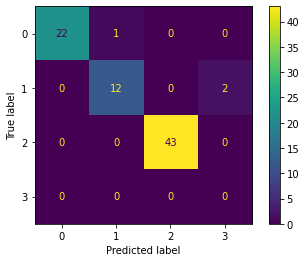

In [6]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictDT)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictDT, ))


# Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
modelRFC=RandomForestClassifier()
modelRFC.fit(X_train, np.ravel(y_train,order='C'))
predictRFC=modelRFC.predict(X_test)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        43

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



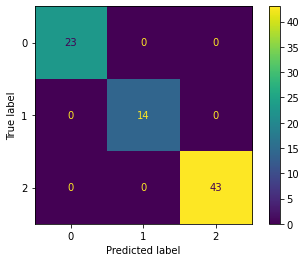

In [8]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictRFC)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictRFC))

# Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB
modelGNB = GaussianNB()
modelGNB.fit(X_train, np.ravel(y_train,order='C'))
predictGNB=modelGNB.predict(X_test)

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        23
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        43
           4       0.00      0.00      0.00         0

    accuracy                           0.99        80
   macro avg       0.75      0.74      0.74        80
weighted avg       1.00      0.99      0.99        80



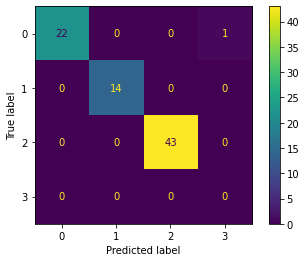

In [10]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictGNB)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictGNB))

# AdaBoost

In [11]:
from sklearn.ensemble import AdaBoostClassifier
modelAda = AdaBoostClassifier()
modelAda.fit(X_train, np.ravel(y_train,order='C'))
predictAda=modelAda.predict(X_test)

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        23
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        43

    accuracy                           0.97        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.98      0.97      0.97        80



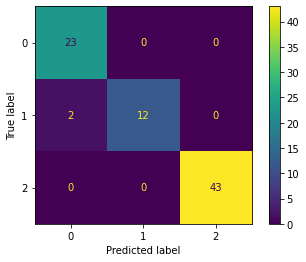

In [12]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictAda)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictAda))

# Data normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)

#scaler.fit(y_train)
#y_train_normalized = scaler.transform(y_train)

scaler.fit(X_test)
X_test_normalized = scaler.transform(X_test)

#scaler.fit(y_train)
#y_test_normalized = scaler.transform(y_test)


# K-Nearest Neighbours

In [14]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN =  KNeighborsClassifier()
modelKNN.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictKNN=modelKNN.predict(X_test_normalized)

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        23
           2       1.00      1.00      1.00        14
           3       0.98      1.00      0.99        43

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



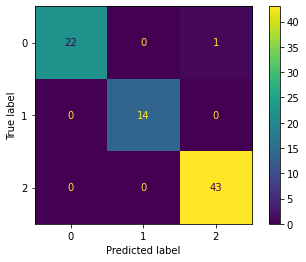

In [15]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictKNN)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictKNN))


# Support Vector Machine

In [16]:
#Support Vector Classifier
from sklearn.svm import SVC
modelSVC = SVC(probability=True)
modelSVC.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictSVC=modelSVC.predict(X_test_normalized)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        43

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



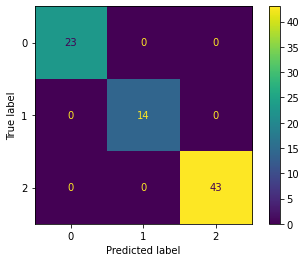

In [17]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictSVC)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictSVC))

In [18]:
# Linear Support Vector Classifier
from sklearn.svm import LinearSVC
modelLSVC = LinearSVC()
modelLSVC.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictLSVC=modelLSVC.predict(X_test_normalized)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        43

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



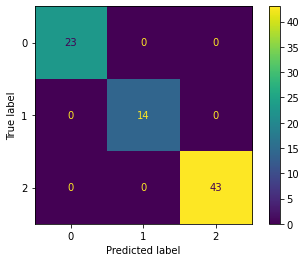

In [19]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictLSVC)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictLSVC))

# Multi-Layer Perceptron

In [20]:
from sklearn.neural_network import MLPClassifier
modelMLP =  MLPClassifier()
modelMLP.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictMLP=modelMLP.predict(X_test_normalized)

              precision    recall  f1-score   support

           1       1.00      0.87      0.93        23
           2       0.93      1.00      0.97        14
           3       0.96      1.00      0.98        43

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



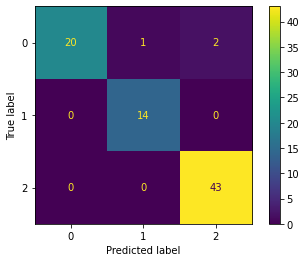

In [21]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictMLP)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictMLP))